In [1]:
%matplotlib inline

import newspaper
from newspaper import Article, Config
import glob
import json
import pandas as pd
import numpy as np
from IPython.core.debugger import set_trace
from pathlib import Path
from tqdm.auto import tqdm
tqdm.pandas()

In [3]:
fnames = glob.glob('newsdata/downloaded/*.json')

# 일별 발행갯수 추이

In [4]:
publish_count = {}

for fname in tqdm(fnames):
    js = json.loads(Path(fname).read_text())
    pub = js['pub']
    published_at = js['published_at']

    if pub not in publish_count:
        publish_count[pub] = {}
        
    if published_at not in publish_count[pub]:
        publish_count[pub][published_at] = 0
        
    publish_count[pub][published_at] += 1

In [21]:
df_count = pd.DataFrame.from_dict(publish_count, orient='index').T.sort_index().iloc[-30:-1]
df_count.index = pd.to_datetime(df_count.index); df_count#['heritage']

,abcnews,aljazeera,atlantic,bbc,businessinsider,cbc,cbs,cnbc,cnn,dailybeast,...,thestreet,thinkprogress,time,townhall,vice,washingtonpost,washingtontimes,wsj,yahoo,zdnet
2019-09-03,48.0,1.0,10.0,83.0,242.0,68.0,52.0,52.0,60.0,25.0,...,34.0,6.0,3.0,48.0,11.0,108.0,130.0,54.0,288.0,31.0
2019-09-04,17.0,NaN,8.0,34.0,128.0,29.0,19.0,53.0,97.0,7.0,...,4.0,6.0,19.0,38.0,15.0,62.0,74.0,29.0,221.0,13.0
2019-09-05,47.0,NaN,28.0,83.0,281.0,72.0,46.0,48.0,84.0,26.0,...,19.0,7.0,13.0,47.0,16.0,110.0,115.0,63.0,159.0,29.0
2019-09-06,47.0,1.0,24.0,84.0,183.0,95.0,50.0,62.0,99.0,27.0,...,32.0,NaN,16.0,41.0,10.0,133.0,128.0,82.0,283.0,36.0
2019-09-07,12.0,NaN,10.0,33.0,174.0,38.0,27.0,22.0,35.0,17.0,...,2.0,NaN,4.0,12.0,10.0,60.0,60.0,24.0,215.0,5.0
2019-09-08,26.0,NaN,7.0,59.0,134.0,45.0,37.0,12.0,46.0,25.0,...,NaN,NaN,7.0,17.0,7.0,87.0,158.0,45.0,257.0,7.0
2019-09-09,63.0,NaN,27.0,85.0,291.0,74.0,60.0,59.0,109.0,28.0,...,26.0,NaN,11.0,46.0,15.0,130.0,190.0,86.0,298.0,41.0
2019-09-10,64.0,2.0,21.0,81.0,349.0,73.0,50.0,60.0,95.0,27.0,...,26.0,NaN,11.0,50.0,16.0,121.0,164.0,68.0,215.0,52.0
2019-09-11,76.0,NaN,22.0,89.0,232.0,75.0,50.0,56.0,102.0,33.0,...,34.0,NaN,12.0,57.0,17.0,124.0,138.0,87.0,271.0,38.0
2019-09-12,82.0,1.0,19.0,105.0,279.0,85.0,57.0,63.0,120.0,28.0,...,40.0,NaN,11.0,61.0,14.0,166.0,239.0,102.0,360.0,47.0


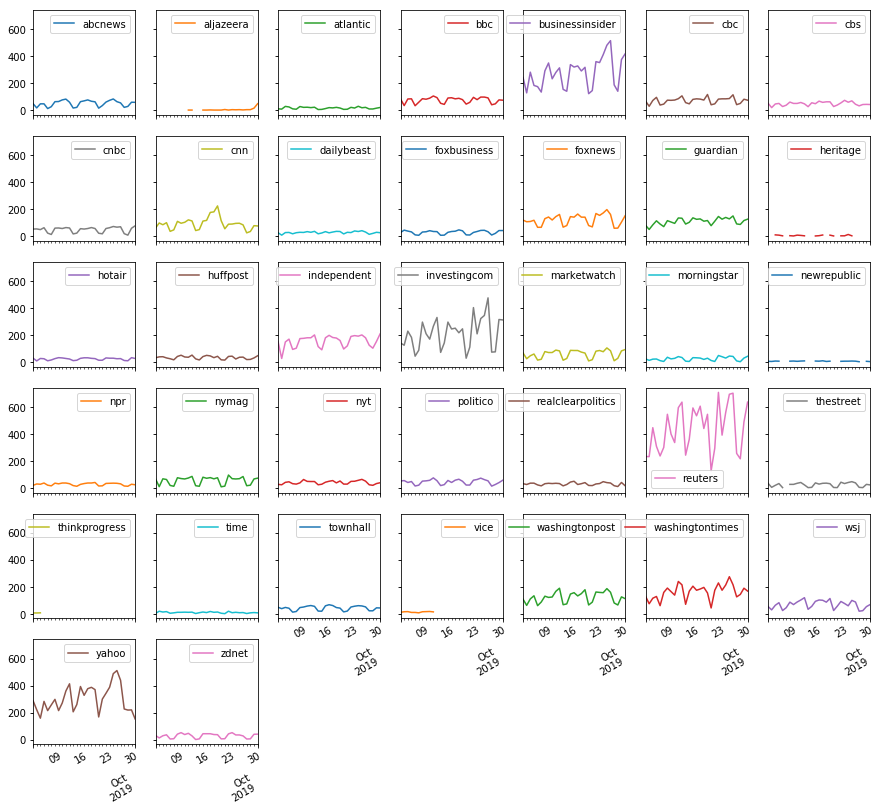

In [9]:
df_count.plot(subplots=True, layout=(6, 7), figsize=(15, 15), sharex=True, sharey=True);

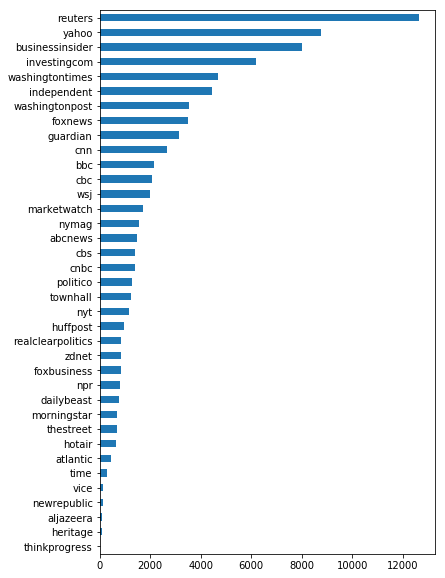

In [10]:
df_count.sum().sort_values().plot.barh(figsize=(6, 10));

# 일별 총 글자수 추이

In [11]:
publish_size = {}

for fname in tqdm(fnames):
    js = json.loads(Path(fname).read_text())
    pub = js['pub']
    published_at = js['published_at']
    size = len(js['text'])

    if pub not in publish_size:
        publish_size[pub] = {}
        
    if published_at not in publish_size[pub]:
        publish_size[pub][published_at] = 0
        
    publish_size[pub][published_at] += size

In [19]:
df_size = pd.DataFrame.from_dict(publish_size, orient='index').T.sort_index().iloc[-30:-1]
df_size.index = pd.to_datetime(df_size.index); df_size#['heritage']

,abcnews,aljazeera,atlantic,bbc,businessinsider,cbc,cbs,cnbc,cnn,dailybeast,...,thestreet,thinkprogress,time,townhall,vice,washingtonpost,washingtontimes,wsj,yahoo,zdnet
2019-09-03,131989.0,6675.0,32088.0,366967.0,723553.0,302212.0,168202.0,115837.0,185610.0,116964.0,...,88244.0,23274.0,20596.0,222857.0,53713.0,660749.0,418659.0,258740.0,915384.0,139650.0
2019-09-04,59965.0,NaN,46690.0,160379.0,460752.0,106468.0,54796.0,147481.0,327259.0,36305.0,...,16774.0,22796.0,85977.0,143004.0,68825.0,346788.0,241870.0,126046.0,704325.0,48730.0
2019-09-05,197578.0,NaN,168445.0,341612.0,949760.0,347363.0,161289.0,121578.0,324097.0,120720.0,...,48173.0,40086.0,64390.0,190855.0,67260.0,827823.0,378854.0,319241.0,521651.0,112775.0
2019-09-06,168970.0,1297.0,111471.0,456452.0,615477.0,418173.0,172292.0,151280.0,321285.0,116364.0,...,90197.0,NaN,58204.0,158166.0,46389.0,852927.0,374479.0,419617.0,871619.0,162313.0
2019-09-07,54590.0,NaN,52918.0,136738.0,598825.0,180272.0,72385.0,61058.0,147898.0,105935.0,...,8554.0,NaN,26541.0,42027.0,63772.0,372183.0,195088.0,122760.0,689912.0,16813.0
2019-09-08,114665.0,NaN,19357.0,249175.0,434722.0,199959.0,177503.0,28576.0,187944.0,208913.0,...,NaN,NaN,19223.0,58061.0,42544.0,541715.0,476886.0,228785.0,839127.0,20839.0
2019-09-09,186972.0,NaN,106960.0,353336.0,925335.0,302200.0,176551.0,215721.0,306941.0,124687.0,...,73200.0,NaN,44063.0,174184.0,59245.0,791849.0,648073.0,370637.0,1005951.0,127411.0
2019-09-10,228888.0,9503.0,73588.0,377183.0,1115491.0,319712.0,138233.0,164705.0,353585.0,125232.0,...,88314.0,NaN,36644.0,197582.0,70783.0,699612.0,505306.0,313307.0,698763.0,179555.0
2019-09-11,264389.0,NaN,121091.0,417080.0,910959.0,290487.0,201684.0,157921.0,380704.0,179653.0,...,115805.0,NaN,36534.0,228371.0,64233.0,820314.0,400458.0,445762.0,988969.0,131376.0
2019-09-12,361115.0,7257.0,95217.0,411656.0,874741.0,335538.0,180034.0,145270.0,456779.0,124752.0,...,131670.0,NaN,58873.0,215203.0,56256.0,1168999.0,662972.0,445218.0,1149489.0,182926.0


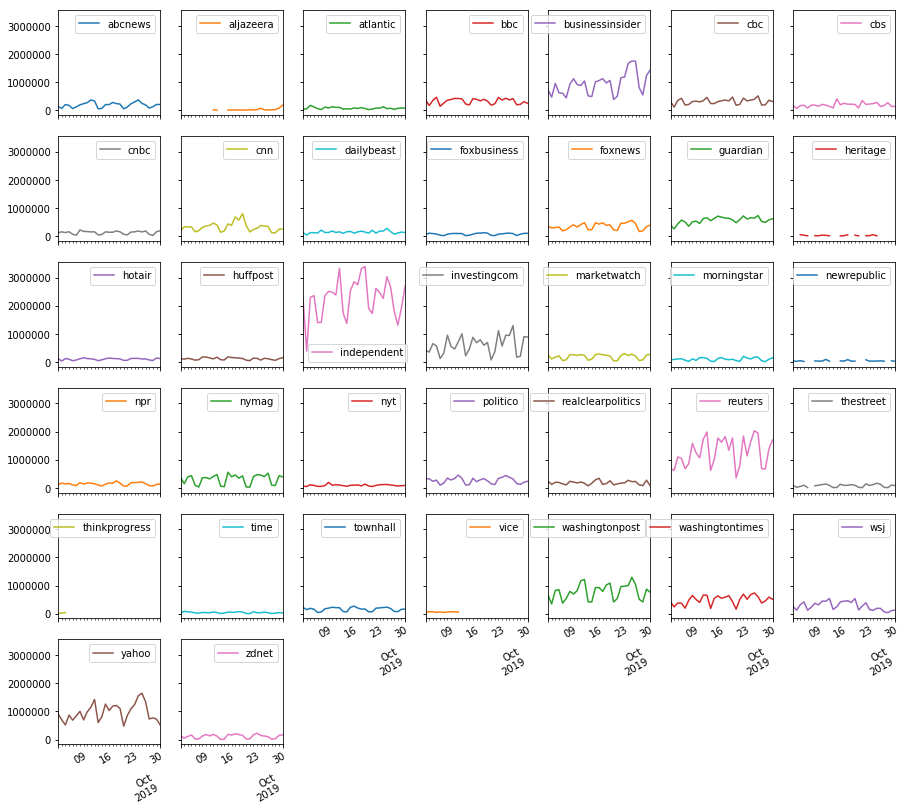

In [13]:
df_size.plot(subplots=True, layout=(6, 7), figsize=(15, 15), sharex=True, sharey=True);

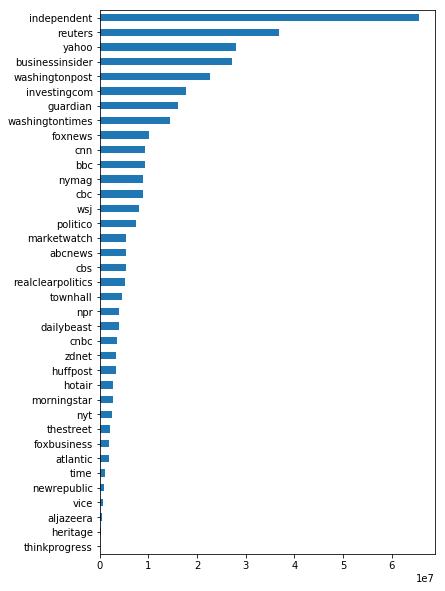

In [14]:
df_size.sum().sort_values().plot.barh(figsize=(6, 10));

In [15]:
(df_size.iloc[-10:].sum()/df_size.iloc[-10:].sum().sum()*100).sort_values()#.plot.barh(figsize=(6,10))

vice                  0.000000
thinkprogress         0.000000
heritage              0.066947
newrepublic           0.220481
time                  0.252440
aljazeera             0.298875
atlantic              0.501077
foxbusiness           0.548239
thestreet             0.643504
nyt                   0.686242
huffpost              0.788690
hotair                0.790912
morningstar           0.842802
zdnet                 0.902131
cnbc                  0.968892
npr                   1.071684
dailybeast            1.183161
townhall              1.233804
wsj                   1.279485
realclearpolitics     1.335406
marketwatch           1.480301
abcnews               1.563698
cbs                   1.625473
cnn                   1.894104
politico              2.066256
bbc                   2.462701
cbc                   2.517306
nymag                 2.539201
foxnews               2.871578
washingtontimes       4.424846
guardian              4.755280
investingcom          5.745927
washingt

# 일별 아티클당 평균 글자수 추이

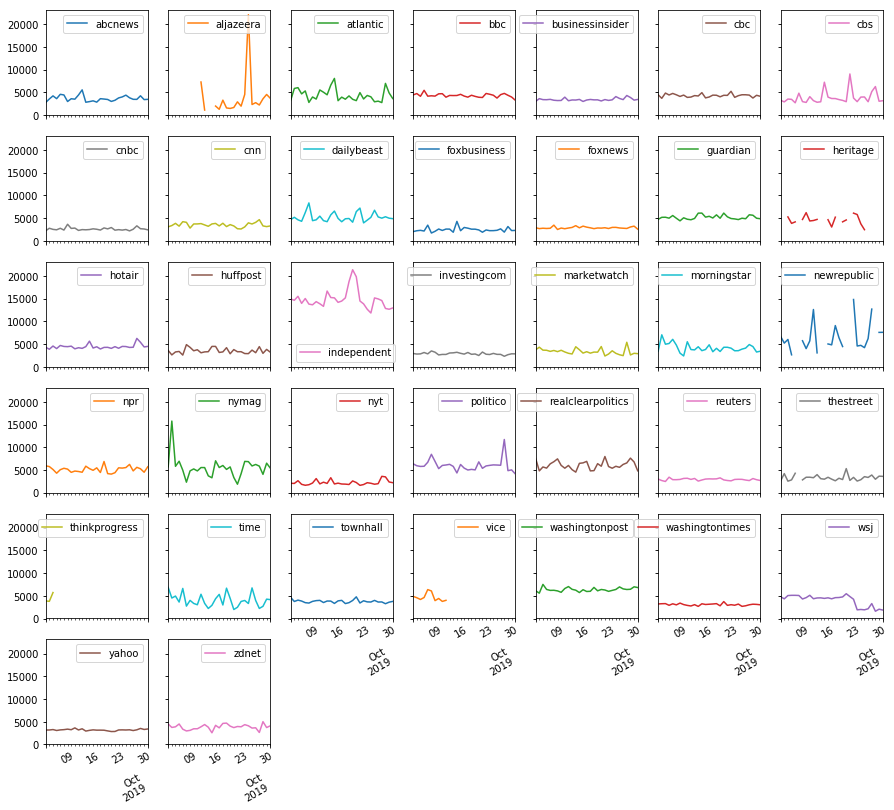

In [16]:
(df_size/df_count).plot(subplots=True, layout=(6, 7), figsize=(15, 15), sharex=True, sharey=True);

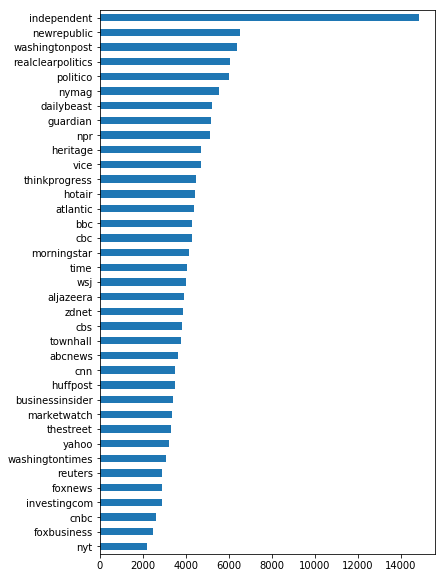

In [17]:
(df_size/df_count).mean().sort_values().plot.barh(figsize=(6, 10));

In [2]:
%load_ext autoreload
%autoreload
%matplotlib inline

from news_crawler import NewsCrawler, clean_url
from IPython.display import display

In [3]:
fnames_trashed = glob.glob('newsdata/trashed/*/*.json')

In [28]:
pubname = 'heritage'
fnames_check = {}

for fname in tqdm(fnames_trashed):
    js = json.loads(Path(fname).read_text())
    pub = js['pub']
    downloaded_at = str(pd.Timestamp(js['downloaded_at']).date())

    if pub == pubname:
        if downloaded_at not in fnames_check:
            fnames_check[downloaded_at] = set()
        
        fnames_check[downloaded_at].add(fname)

In [32]:
fnames_check.keys()

dict_keys(['2019-09-04', '2019-09-13', '2019-09-19', '2019-09-27', '2019-09-12', '2019-09-25', '2019-10-01', '2019-09-24', '2019-09-10', '2019-09-20', '2019-09-18', '2019-09-17', '2019-09-09', '2019-09-06', '2019-09-23'])

In [44]:
len(set.union(*fnames_check.values()))

163

In [4]:
# done: heritage, huffpost, cnn
#time, thestreet, cnbc
urls_trashed = {} 
pubs_list = ['nyt', 'businessinsider', 'foxnews', 'foxbusiness', 'washingtontimes']#, 'politico', 'investingcom', 'bbc', 'morningstar']

for fname in tqdm(fnames_trashed):
    js = json.loads(Path(fname).read_text())
    pub = js['pub']
    url = clean_url(pub, js['url'])

    if pub in pubs_list:
        if pub not in urls_trashed:
            urls_trashed[pub] = set()

        urls_trashed[pub].add(url)

In [5]:
len(set.union(*urls_trashed.values()))

7090

In [6]:
crawler = NewsCrawler()

In [7]:
crawler.urls_selected = urls_trashed

In [ ]:
download_results = crawler.download2(); download_results

37.31% (1167.11 seconds): downloading...

In [9]:
crawler.urls_final

In [11]:
import hashlib
[hashlib.sha1(url.encode('utf-8')).hexdigest() for url in crawler.urls_final['cnn']['trashed']]

['4273aedcbce47874f8120bef3571bee4ef1c007b',
 '15acfa4614324846a1d8350f74130bc3c613b4f0',
 '98e774e632c6ad0fcc568f85c370d041290908b2',
 '2d4b0ec735fa93ee0b49c75072e8df1db7ca5e22',
 '26856b0c3a8b021e7378cc826d22e424b3ca1a5c',
 '509fe72ef7c70b2d1e11a8e008a27d865cbea948',
 'a21c45224a38c68ba4b2a1131bff36870a5e54c9',
 'ba37c527f979dfa7a9fb658f201ea9b6152a6b5f',
 '1dcb2b4dd89f1bf7659dbb6cbc0d9f0f31709fb8',
 'ee55fc4634a928934ece7347d287c1214d11a393',
 'c193accd024568981bc2d37b2e0c49cfc185e6c5',
 'f8f963d74d3b486b45515bc02b01168941d20a39',
 '981027a23403bf8b4d287554d3faf9df968dd0a9',
 '4a326c97680137b5bb62541928f0f9421f5d1e01',
 '0126d43e6e66a10eea1621e3cf3a794cae4d8b86',
 '92691c0b400f5ebcb6884a6cc2e4b73148e490d0',
 'd9fb9575c124e963ca42fba5cf0e49bc35918ccb',
 '6f8e6760aac051261a8bdd021a95037c1424513d',
 '015e1c4cbfb01e2f686cee8ccfd5ea61ff75e250',
 '1d59727430240414c07a4d80d9bd4c1f20c1154b',
 'bba5ea70062596eff62c5a8eebcc5fa2cbf8497f',
 '5f03dd3c8bafcf9f751fcc98d91c310054edc077',
 '74fbf2ba